## CIFAR-10

The CIFAR-10 dataset contains 60,000 color images of 32 x 32 pixels in 3 channels divided into 10 classes. Each class contains 6,000 images. The training set contains 50,000 images, while the test sets contains 10,000 images.

I choose Keras as my deep learning framework since it is begginer friendly and it is what we mainly use in our textbook.

The challenge is to recognize previously unseen images and assign them to one of the 10 classes.

### Import Data

We are going to import data directly from the Keras datasets. First, divide the dataset into train data, validation data and test data.

In [3]:
from tensorflow.keras.datasets import cifar10
import seaborn as sns

(X_train_full, y_train_full), (X_test, y_test)=cifar10.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

print('Shape of X_train is {}'.format(X_train.shape))
print('Shape of X_valid is {}'.format(X_valid.shape))
print('Shape of X_test is {}'.format(X_test.shape))
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_valid is {}'.format(y_valid.shape))
print('Shape of y_test is {}'.format(y_test.shape))

Shape of X_train is (45000, 32, 32, 3)
Shape of X_valid is (5000, 32, 32, 3)
Shape of X_test is (10000, 32, 32, 3)
Shape of y_train is (45000, 1)
Shape of y_valid is (5000, 1)
Shape of y_test is (10000, 1)


### Preprocessing Data

Before we start training, it's better to preprocess the data with normalization and one hot encoding.

For normalizing the pixel data, we can simply divide the whole pixel values with 255. Since pixel values ranges from 0-255, it will bring all the values in the data into a common scale 0-1.

CIFAR-10 has 10 categories, in general it's a good practice to label the categorical data using the one hot encoding. 

In [4]:
from tensorflow.keras.utils import to_categorical

# Normalization
X_train = X_train/255
X_valid = X_valid/255
X_test = X_test/255

# One hot encoding
y_train = to_categorical(y_train,10)
y_valid = to_categorical(y_valid,10)
y_test = to_categorical(y_test,10)

### Basic CNN Model

The first model I choose is a basic convolution neural network. CNN is proven very effective on image data. 

We will start with 3 convolutonal layers with the input shape of (32,32,3) and the activation function 'relu'. The first layer will have 32 filters, and the number of filters doubles as we climb up the CNN towards the output layer (32->64->128). A batch normalization is used in each layer to keep the input zero-centered and scaled. Each layer is attached to a maxpool layer. Max pooling is a great way to reduce the size of parameters with out loosing much information.

In order to avoid overfitting, we'll apply some regularization techniques as well. Here I choose to drop out some of the neural units randomly from our network. This forces the next layer to learn the patterns again, which will make our model more robust. The initial dropout rate is 0.2, and we'll increase the rate by 0.1 for each layer towards the output layer.

After 3 convolutional layers, we will flatten the intermediate results and pass them to a Dense network. Then the dense network result will be passed to a final output layer, where the number of units represent the number of categories in the data, which is 10 in our case. Softmax is chosen as final activation because we need the highest probable class out of 10. Finally we'll compile the model using adam optimizer.

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense

model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model1.add(BatchNormalization())
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(0.2))
model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(BatchNormalization())
model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(0.3))
model1.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(BatchNormalization())
model1.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(0.4))
model1.add(Flatten())
model1.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
model1.add(Dense(10, activation='softmax'))

# compile model
# opt = SGD(lr=0.001, momentum=0.9)
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model5.fit_generator(train_generator,epochs=200,steps_per_epoch=training_steps,validation_data=test_generator,validation_steps=validation_steps,callbacks=[board])
history1 = model1.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))

2021-12-18 17:07:12.804901: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2021-12-18 17:07:14.530697: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1407/1407 [==============================] - 17s 7ms/step - loss: 1.6000 - accuracy: 0.4449 - val_loss: 1.1701 - val_accuracy: 0.5902
Epoch 2/50
1407/1407 [==============================] - 9s 6ms/step - loss: 1.0936 - accuracy: 0.6120 - val_loss: 0.9734 - val_accuracy: 0.6524
Epoch 3/50
1407/1407 [==============================] - 9s 6ms/step - loss: 0.9222 - accuracy: 0.6776 - val_loss: 0.7232 - val_accuracy: 0.7486
Epoch 4/50
1407/1407 [==============================] - 9s 6ms/step - loss: 0.8223 - accuracy: 0.7164 - val_loss: 0.7367 - val_accuracy: 0.7416
Epoch 5/50
1407/1407 [==============================] - 9s 6ms/step - loss: 0.7422 - accuracy: 0.7431 - val_loss: 0.6956 - val_accuracy: 0.7626
Epoch 6/50
1407/1407 [==============================] - 8s 6ms/step - loss: 0.6788 - accuracy: 0.7660 - val_loss: 0.5743 - val_accuracy: 0.8066
Epoch 7/50
1407/1407 [==============================] - 9s 6ms/step - loss: 0.6321 - accuracy: 0.7847 - val_loss: 0.5763 - val_accuracy: 0.8054
Ep

In [10]:
_, acc = model1.evaluate(X_valid, y_valid, verbose=0)
print('Accuracy: %.3f' % (acc * 100.0))

Accuracy: 86.720


<AxesSubplot:>

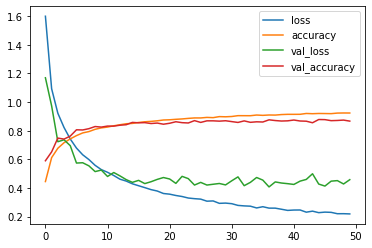

In [11]:
import pandas as pd
pd.DataFrame(history1.history).plot()

### AlexNet

The second architecture I use is the AlexNet architecture. The AlexNet CNN takes in data of 227 * 227 size, but the original image in the dataset has a relatively small size of 32 * 32. So the first step here will be resizing the image to 224 * 224 (7 times of orginal width/height). 

Then we can follow the steps in the paper to build our model. The author uses two regularization technieques to reduce overfitting: dropout and data augmentation. For augmentation, we'll make use of the `ImageDataGenerator` in tensorflow keras preprocessing library.

***For this step, sadly my laptop does't have enough RAM to run the resizing task. I'll leave the code here and skip this one.***

In [5]:
from tensorflow.image import resize
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Input, ZeroPadding2D, Activation
from tensorflow.keras import models, optimizers
import numpy as np

# resize original data
X_train_alex, X_valid_alex = X_train_full[:-5000], X_train_full[-5000:]
X_train_resize = np.zeros((X_train_alex.shape[0], 224, 224, X_train_alex.shape[3]))
X_valid_resize = np.zeros((X_valid_alex.shape[0], 224, 224,X_valid_alex.shape[3]))

for i in range(X_train_alex.shape[0]):
    X_train_resize[i] = resize(X_train_alex[i],(224, 224))
    
for i in range(X_valid_alex.shape[0]):
    X_valid_resize[i] = resize(X_valid_alex[i],(224, 224))
    
# data augmentation
datagen = image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True, rotation_range=20)
train_gen = datagen.flow(X_train_alex, y_train, batch_size=32)

# build model
inp = Input(shape=(224, 224, 3))

L1 = ZeroPadding2D((2, 2))(inp)
L1 = Conv2D(96, (11, 11), strides=(4, 4), padding='valid', activation='relu')(L1)
L1 = MaxPooling2D((3, 3), strides=(2, 2))(L1)

L2 = Conv2D(256, (5, 5), activation='relu', padding='same')(L1)
L2 = MaxPooling2D((3, 3), strides=(2, 2))(L2)

L3 = Conv2D(384, (3, 3), activation='relu', padding='same')(L2)

L4 = Conv2D(384, (3, 3), activation='relu', padding='same')(L3)

L5 = Conv2D(256, (3, 3), activation='relu', padding='same')(L4)
L5 = MaxPooling2D((3, 3), strides=(2, 2))(L5)

fc = Flatten()(L5)

fc1 = Dense(4096)(fc)
fc1 = BatchNormalization()(fc1)
fc1 = Activation('relu')(fc1)
fc1 = Dropout(0.5)(fc1)

fc2 = Dense(4096)(fc1)
fc2 = BatchNormalization()(fc2)
fc2 = Activation('relu')(fc2)
fc2 = Dropout(0.5)(fc2)

pred = Dense(10)(fc2)
pred = BatchNormalization()(pred)
pred = Activation('softmax')(pred)

model2 = models.Model(inp, pred)

# compile model
opt = optimizers.Adam(learning_rate=0.01)
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history2 = model2.fit(train_gen, steps_per_epoch=45000/32, epochs=10, validation_data=(X_valid_alex, y_valid))


### VGGNet

### ResNet